Imbalance Dataset Handling

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Set the random seed for reproducibility
np.random.seed(123)
# Create a dataframe with 2 classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples-n_class_0

In [4]:
n_class_0

900

In [5]:
n_class_1

100

In [6]:
class_0 = pd.DataFrame({
    'feature_1':np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2':np.random.normal(loc=0, scale=1, size=n_class_0),
    'target':[0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2':np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1]*n_class_1
})

In [8]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [9]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [10]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [15]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [16]:
df_minority.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [17]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


UpSampling

In [18]:
from sklearn.utils import resample
df_minority_upsample = resample(df_minority, replace = True,n_samples=len(df_majority), random_state=42)
# replace = True : Sample With replacement
# n_samples=len(df_majority): To match the majority class

In [19]:
df_minority_upsample.shape

(900, 3)

In [20]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [21]:
df_minority_upsample['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [23]:
df_upsampled = pd.concat([df_majority, df_minority_upsample])

In [24]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [25]:
df_upsampled.shape

(1800, 3)

DownSampling

In [26]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [28]:
from sklearn.utils import resample
df_majority_downsample = resample(df_majority, replace = False,n_samples=len(df_minority), random_state=42)

In [29]:
df_majority_downsample.shape

(100, 3)

In [30]:
df_downsample = pd.concat([df_minority, df_majority_downsample])

In [31]:
df_downsample.shape

(200, 3)

In [32]:
df_downsample['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

SMOTE

In [33]:
from sklearn.datasets import make_classification

In [36]:
# X - Independent Feature
# y - Dependent Feature
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.90], random_state=42)

In [47]:
X

array([[-0.05861915, -0.35109008],
       [ 1.24668618,  1.15359685],
       [ 0.96277683,  0.85939747],
       ...,
       [-0.10126746, -1.59017563],
       [ 0.64376105, -0.78053855],
       [ 0.69852984, -1.27940455]])

In [48]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
df1 = pd.DataFrame(X,columns=['f1', 'f2'])
df2 = pd.DataFrame(y,columns=['target'])

In [43]:
df = pd.concat([df1, df2], axis=1)

In [45]:
df.head()

,f1,f2,target
0,-0.058619,-0.351090,0
1,1.246686,1.153597,1
2,0.962777,0.859397,1
3,-2.957441,2.033645,1
4,0.871229,-1.205785,0


In [46]:
df['target'].value_counts()

target
0    895
1    105
Name: count, dtype: int64

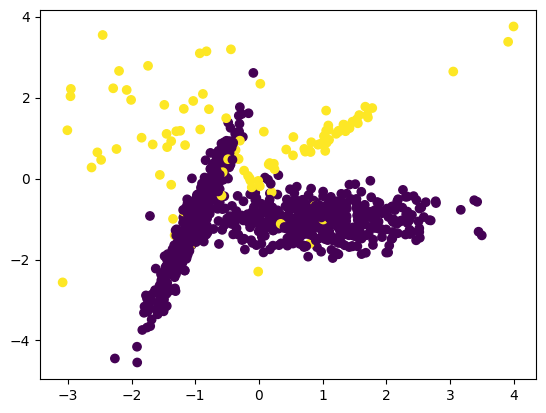

In [50]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'], df['f2'], c=df['target'])

In [51]:
! pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.3 kB 217.9 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 252.2 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.3 kB 306.3 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.3 kB 306.3 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.3 kB 306.3 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 228.2 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 242.7 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 242.7 kB/s eta 0:

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
# Transform the dataset
over_sample = SMOTE()
X,y = over_sample.fit_resample(df[['f1','f2']], df['target'])

In [54]:
X

,f1,f2
0,-0.058619,-0.351090
1,1.246686,1.153597
2,0.962777,0.859397
3,-2.957441,2.033645
4,0.871229,-1.205785
...,...,...
1785,-2.239746,2.452350
1786,-1.448176,1.837838
1787,-0.786947,1.722427
1788,0.792039,0.687455


In [55]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1785    1
1786    1
1787    1
1788    1
1789    1
Name: target, Length: 1790, dtype: int32

In [56]:
X.shape

(1790, 2)

In [57]:
y.shape

(1790,)

In [60]:
len(y[y==0]), len(y[y==1])

(895, 895)

In [61]:
df1 = pd.DataFrame(X,columns=['f1', 'f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1, df2], axis=1)

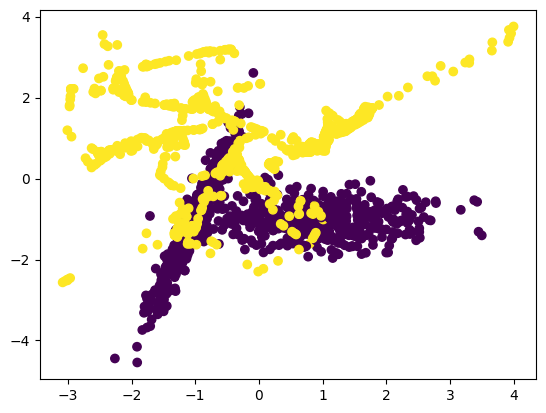

In [62]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, 

- Linear Interpolation

In [63]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

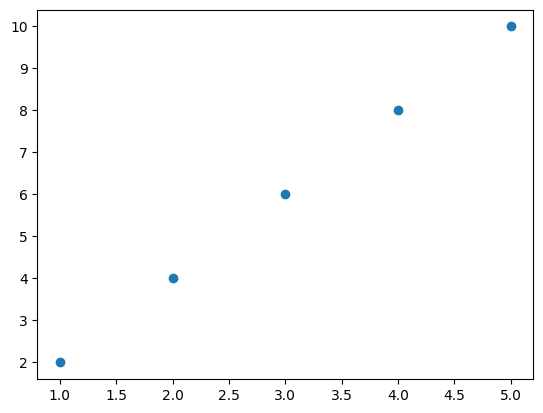

In [65]:
plt.scatter(x, y)

In [66]:
# Interpolate the data using linear interpolation
x_new = np.linspace(1,5,10) # Create new x-values
y_interp = np.interp(x_new,x,y) # Interpolate the y values
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


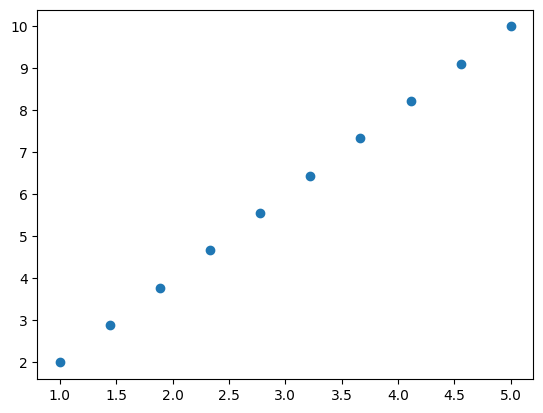

In [69]:
plt.scatter(x_new, y_interp)

- Cubic Interpolation

In [70]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

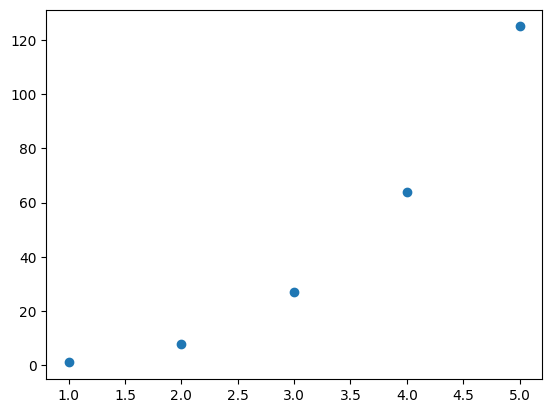

In [71]:
plt.scatter(x,y)

In [72]:
from scipy.interpolate import interp1d
# Create a cubic intrepolation function
f = interp1d(x,y,kind='cubic')

In [73]:
x_new = np.linspace(1,5,10)
y_interp = f(x_new)
print(y_interp)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


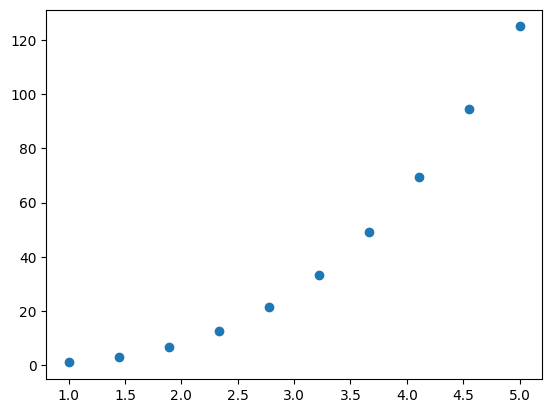

In [74]:
plt.scatter(x_new, y_interp)

- Polynomial Interpolation

In [75]:
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])

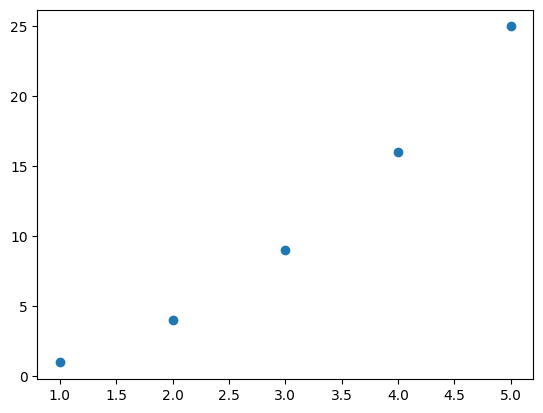

In [79]:
plt.scatter(x,y)

In [76]:
# Interpolate the data using polynomial interpolation
p = np.polyfit(x,y,2) # Fit a 2nd degree polynomial to the data

In [77]:
x_new = np.linspace(1,5,10)
y_interp = np.polyval(p,x_new)

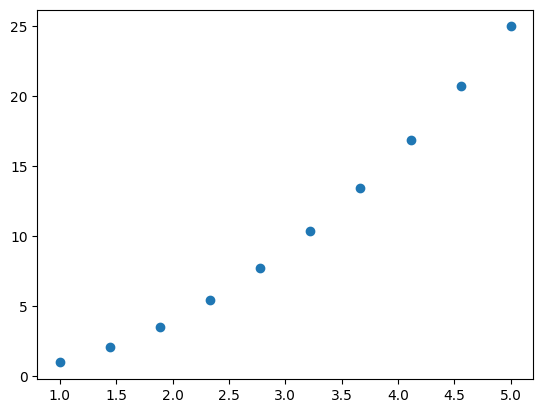

In [78]:
plt.scatter(x_new, y_interp)